In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from google.colab import drive

In [37]:
# Step 1: Extract the image data
#drive.mount('/content/drive')
#df_lung = pd.read_pickle('/content/lung_df.pkl')
df_lung = pd.read_pickle('lung_df (3).pkl')

In [38]:
# Step 1.5: Filter so only 0 and 1 (Cancer and no cancer) are selected
df_lung = df_lung[df_lung['label'].isin([0, 1,2])]

In [39]:
df_lung

,image,label,area
0,"[[[213, 200, 244], [203, 191, 247], [206, 195,...",0,lung
1,"[[[144, 100, 213], [143, 109, 229], [141, 106,...",0,lung
2,"[[[182, 146, 233], [174, 146, 231], [182, 147,...",0,lung
3,"[[[143, 119, 228], [147, 124, 238], [148, 124,...",0,lung
4,"[[[178, 203, 244], [179, 204, 245], [179, 204,...",0,lung
...,...,...,...
14995,"[[[173, 142, 237], [117, 86, 210], [203, 180, ...",2,lung
14996,"[[[153, 120, 227], [165, 137, 240], [158, 114,...",2,lung
14997,"[[[155, 108, 214], [142, 105, 214], [141, 104,...",2,lung
14998,"[[[190, 144, 239], [151, 95, 226], [170, 133, ...",2,lung


In [40]:
# Step 2: Preprocess the image data

# Convert the image data to NumPy arrays
image_data = np.array(df_lung['image'].tolist())

# Normalize the pixel values to range between 0 and 1
image_data = (image_data / 255.0) - 0.5

# Reshape the image data to have a single color channel (assuming it's RGB)
image_data = image_data.reshape(image_data.shape[0], image_data.shape[1], image_data.shape[2], 3)


In [41]:
# Step 3: Extract labels

# Convert the labels to numerical values
labels = df_lung['label']


In [42]:
# Step 4: Split the data into training and testing sets

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels, test_size=0.2, random_state=42
)

In [43]:
# Step 5: Build the CNN model
model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(image_data.shape[1], image_data.shape[2], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')  # Change the number of output neurons to 3*
])

In [44]:
# Step 6: Compile and train the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
375/375 [==============================] - 4s 5ms/step - loss: 0.3647 - accuracy: 0.8220 - val_loss: 0.3017 - val_accuracy: 0.8600
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2259 - accuracy: 0.9073 - val_loss: 0.2308 - val_accuracy: 0.9007
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1852 - accuracy: 0.9261 - val_loss: 0.1994 - val_accuracy: 0.9143
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1578 - accuracy: 0.9381 - val_loss: 0.1943 - val_accuracy: 0.9217
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1395 - accuracy: 0.9470 - val_loss: 0.1760 - val_accuracy: 0.9313
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1192 - accuracy: 0.9533 - val_loss: 0.1771 - val_accuracy: 0.9337
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1150 - accuracy: 0.9550 - val_loss: 0.1566 - val_accuracy: 0.9353
Epoch 

In [45]:
# Step 7: Evaluate the model

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Convert test_labels to 1D array
test_labels_1d = test_labels.values

# Calculate additional metrics
predictions = model.predict(test_images)

# Apply threshold to obtain binary predictions
threshold = 0.5
binary_predictions = np.where(predictions[:, 1] >= threshold, 1, 0)  # Assuming cancer is the positive class

# Accuracy
accuracy = accuracy_score(test_labels_1d, binary_predictions)
print(f'Accuracy: {accuracy}')

# Convert predictions to binary array
predictions_binary = np.argmax(predictions, axis=1)

# Confusion matrix
confusion = confusion_matrix(test_labels, predictions_binary)
print("Confusion Matrix:")
print(confusion)

# True positive (TP), true negative (TN), false positive (FP), false negative (FN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)
sensitivity = TP / (TP + FN)
print(f'Sensitivity/Recall: {sensitivity}')

# Specificity or True Negative Rate (TNR)
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

# Precision or Positive Predictive Value (PPV)
precision = TP / (TP + FP)
print(f'Precision: {precision}')

# Negative Predictive Value (NPV)
npv = TN / (TN + FN)
print(f'Negative Predictive Value: {npv}')

# F1 Score (Harmonic mean of precision and recall)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f'F1 Score: {f1_score}')

# Matthews Correlation Coefficient (MCC)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print(f'Matthews Correlation Coefficient: {mcc}')

# Recall
recall = sensitivity
print(f'Recall: {recall}')



94/94 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9520
Test loss: 0.19972319900989532
Test accuracy: 0.9520000219345093
94/94 [==============================] - 0s 2ms/step
Accuracy: 0.6646666666666666
Confusion Matrix:
[[950   4  83]
 [  9 961   0]
 [ 48   0 945]]
Sensitivity/Recall: 0.9907216494845361
Specificity: 0.9958071278825996
Precision: 0.9958549222797928
Negative Predictive Value: 0.9906152241918665
F1 Score: 0.99328165374677
Matthews Correlation Coefficient: 0.9864994614838192
Recall: 0.9907216494845361


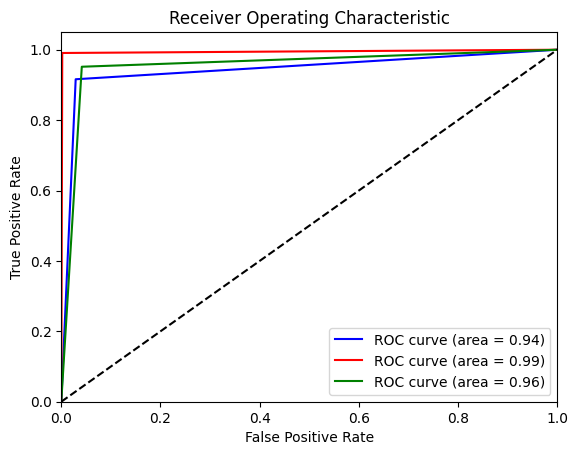

In [46]:
from sklearn.metrics import roc_curve, auc

# Convert predictions to one-hot encoded array
predictions_one_hot = keras.utils.to_categorical(predictions_binary, num_classes=3)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels_1d == i, predictions_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


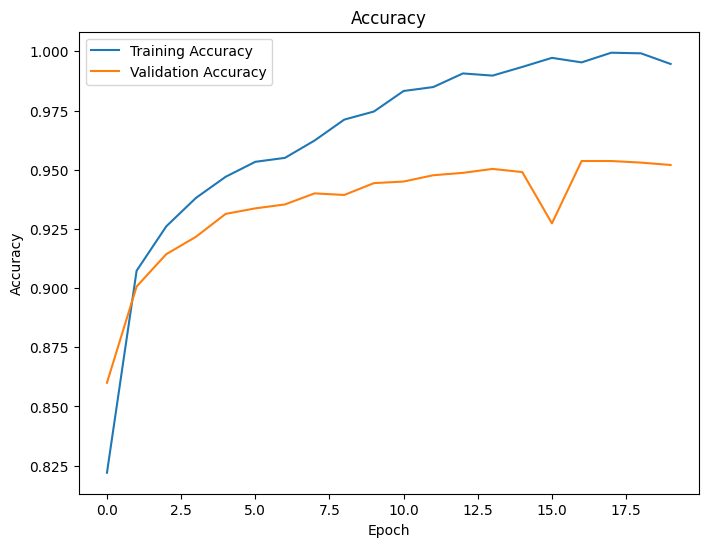

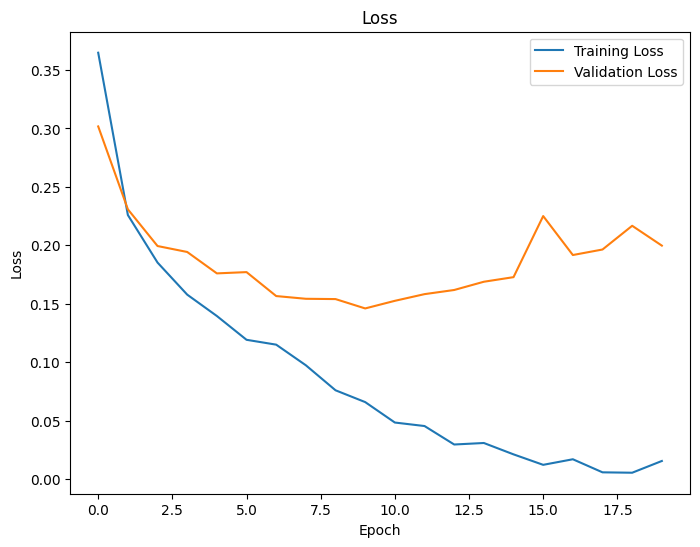

In [47]:
# Step 8: Plot accuracy and loss curves

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
# Guardar el modelo
model.save('./sample_data/lung_model_0_1_2.h5')